# Day 4, Plotting

In [1]:
import matplotlib.pyplot as plt,os,time,matplotlib;import numpy as np; import pandas as pd
im_path=os.sep.join((os.getcwd(),'pictures',''))
def sho(img,figsize=(12,6)):
    fig,ax=plt.subplots(figsize=figsize)
    img=plt.imread(img)
    ax.imshow(img)
    ax.axis('off')
%matplotlib inline

<BarContainer object of 349 artists>

findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.


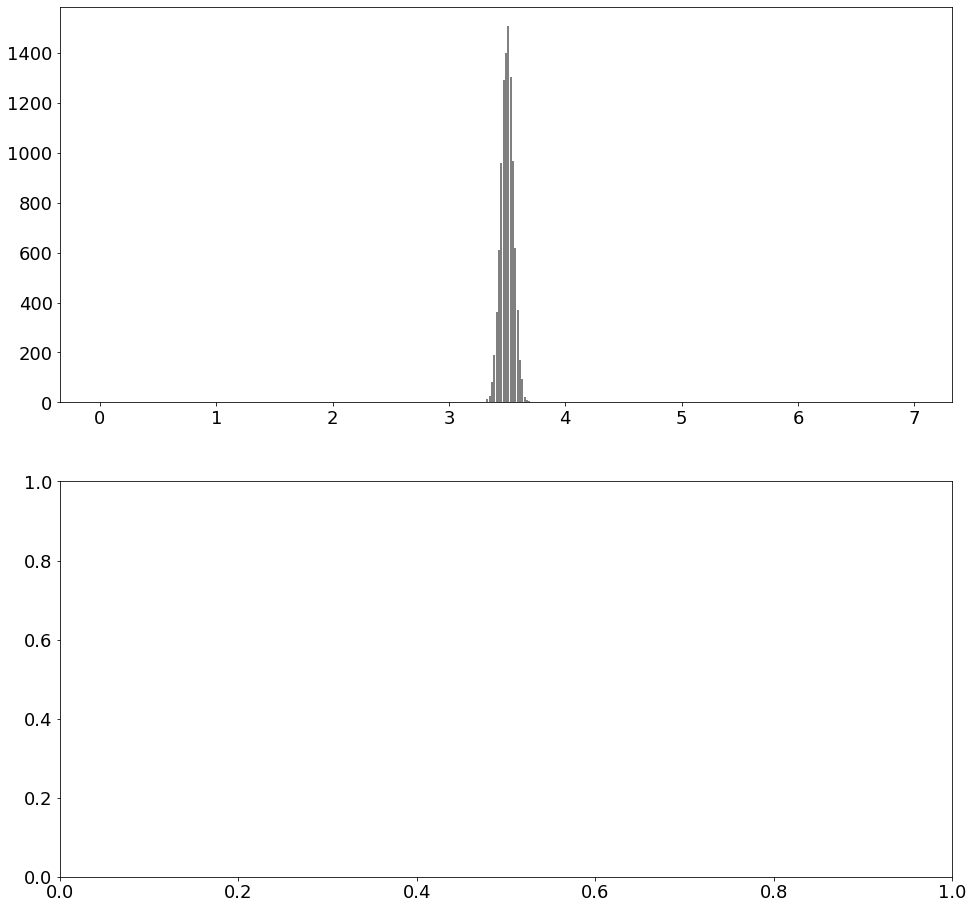

In [2]:
font = {'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 18}
matplotlib.rc('font', **font)
plt.close('all')
fig,ax=plt.subplots(2,1,figsize=(16,16))
experiments=int(1.e4)
throws=1000

np.random.seed(12345)
results=np.random.choice(range(1,7),(throws,experiments))
res_mean=results.mean(axis=0)
steps_per_roll=50
bins=np.arange(0,7.,1/steps_per_roll)
counts,bins=np.histogram(res_mean,bins=bins)
bins_center=(bins[1:]+bins[:-1])/2

ax[0].bar(bins_center,counts,color='grey',width=0.8/steps_per_roll,label='number of experiments')

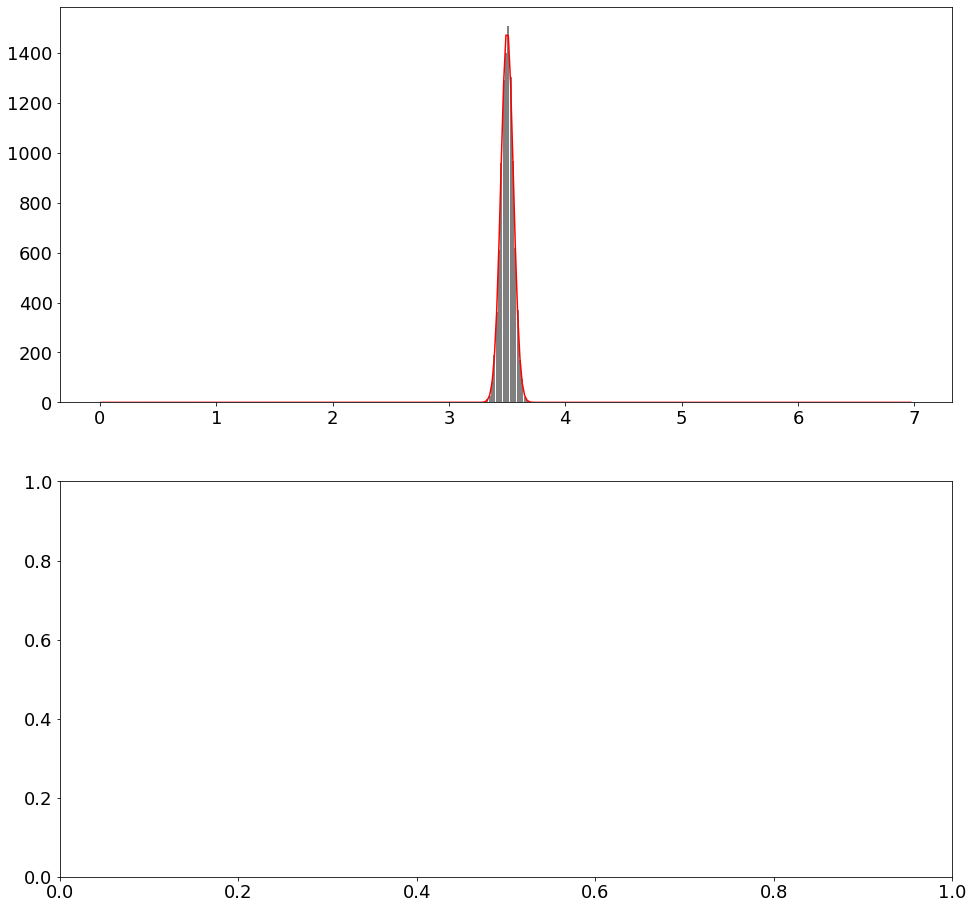

In [3]:
#Function
def gauss(x=None,mu=0,sigma=1):
    scale=sigma*np.sqrt(2.*np.pi)
    expo=(x-mu)**2/(-2.*sigma**2)
    return np.e**expo/scale
counts_in_bins=experiments/steps_per_roll
g=gauss(x=bins_center,mu=res_mean.mean(),sigma=res_mean.std())
ax[0].plot(bins_center,g*counts_in_bins,'r',label='gaussian')
fig

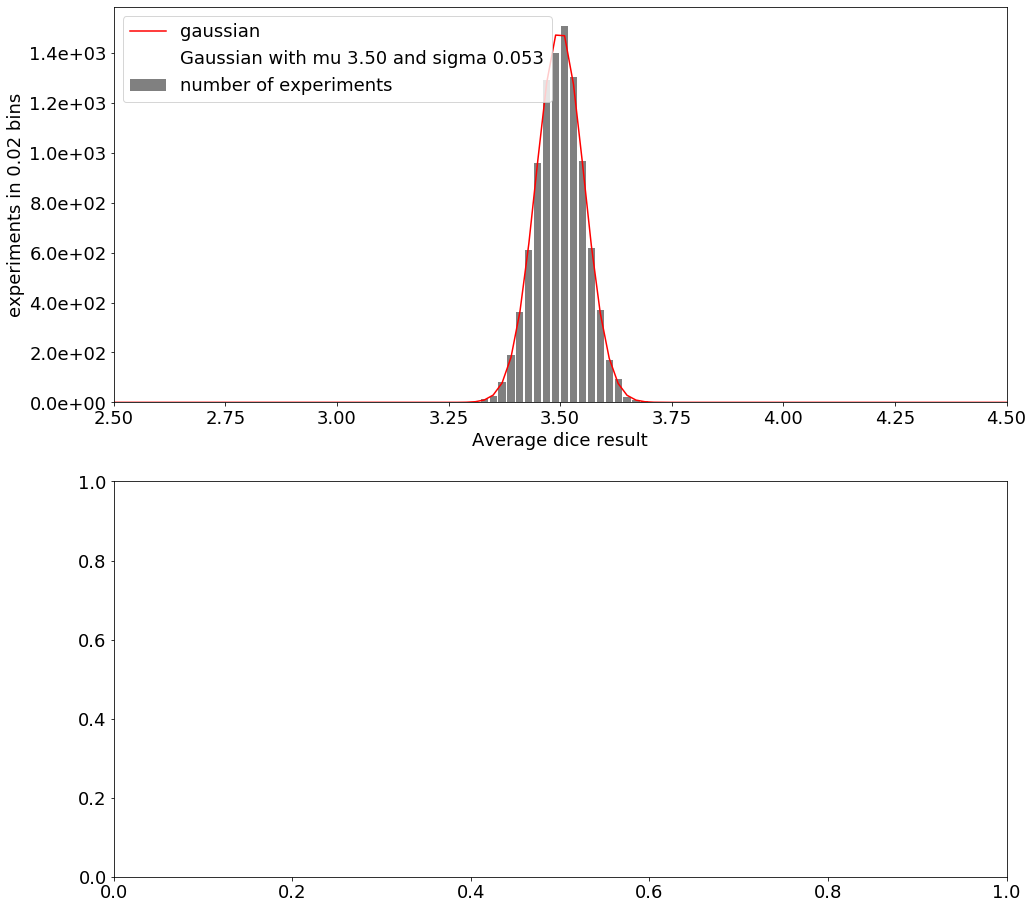

In [4]:
#1/e
x=res_mean
y=np.random.rand(np.shape(res_mean)[0])*gauss(x=res_mean,mu=res_mean.mean(),sigma=res_mean.std())
ax[0].set_xlim(2.5,4.5)
ax[0].set_xlabel('Average dice result')
ax[0].set_ylabel('experiments in %.2f bins'%(1/steps_per_roll))
ax[0].plot([], [], ' ', label="Gaussian with mu %.2f and sigma %.3f"%(res_mean.mean(),res_mean.std()))
ax[0].legend(loc=2)
ax[0].set_xticklabels(['%.2f'%a for a in ax[0].get_xticks()])
ax[0].set_yticklabels(['%.1e'%a for a in ax[0].get_yticks()])
fig

In [5]:
fig.savefig('dice_example.png',dpi=250)
fig.savefig('dice_example.svg')

In [6]:
#advanced

def find_ind(vec,target):
    return (np.abs(vec-target)).argmin()
g=gauss(x=bins_center,mu=res_mean.mean(),sigma=res_mean.std(ddof=1))
limits=res_mean.mean()-res_mean.std(ddof=1),res_mean.mean()+res_mean.std(ddof=1)

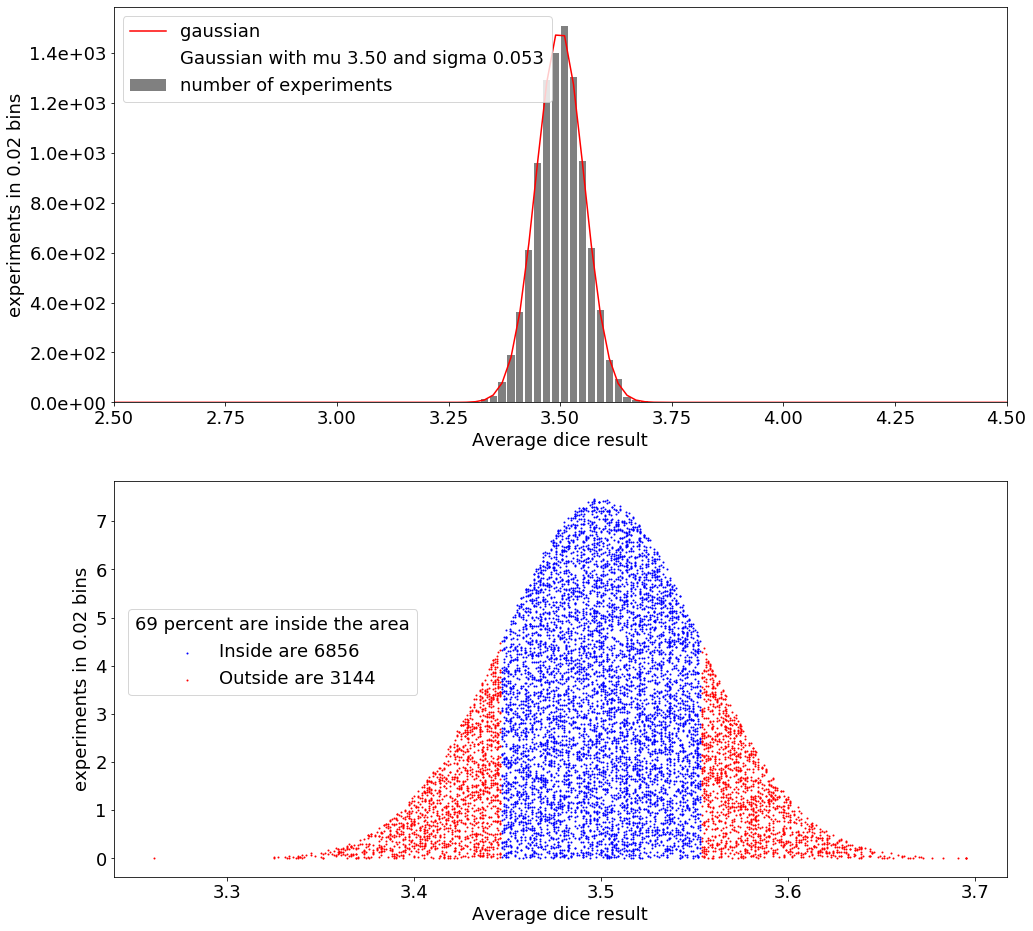

In [7]:
slicing=np.all((x>limits[0],x<limits[1]),axis=0)
inside_the_area=slicing.sum()
outside_the_area=np.invert(slicing).sum()
ax[1].cla()
ax[1].scatter(x[slicing],y[slicing],s=1,color='blue',label='Inside are %i'%inside_the_area)
ax[1].scatter(x[np.invert(slicing)],y[np.invert(slicing)],s=1,color='red',label='Outside are %i'%outside_the_area)
ax[1].legend(bbox_to_anchor=(0.35,0.7),title='%.0f percent are inside the area'%(inside_the_area*100/experiments))
ax[1].set_xlabel('Average dice result')
ax[1].set_ylabel('experiments in %.2f bins'%(1/steps_per_roll))
fig

In [8]:
fig.savefig('dice_example.png',dpi=250)
fig.savefig('dice_example.svg')

## What does this mean?

If I throw a dice 100 times then in 68% of all cases the "real value" will be within the standard diviation of the data assuming that the data is normal distributed (like most measurements) often this is used as "error" of the measurement. for large number of discrete throws of dices this works, because of the:
https://en.wikipedia.org/wiki/Central_limit_theorem

We speak about the experiment (discrete value) and the model (the gaussian or normal distributed data). So the discrete model in fact says: If I throw my dice 100 times I will most likely get something around 350 as the sum of these throws and with 68% probability my result will lay within $350\pm 15$.

Looking into this webpage you will find that this spread of the data can be estimated by the variance of the experiment.
Remember the standard deviation was defined as $\sqrt{\frac{\sum_n{x_i - \bar x}^2}{n-1}}$ carefully, there are two $\sqrt{\frac{\sum_n{x_i - \bar x}^2}{n}}$

As a wild guess, the average is somewhere in the middle, so $\frac{1+6}{2}=3.5$ is the mean and $2.5^2 + 2.5^2$ the total width. Or 

$\bar x \pm std(x)/2$ 

is your confidence interval

Important to remember: the variance is the 65% environment. To be more sure people often use the "two sigma environment" which then contains 98%

In [9]:
dice=np.arange(1,7,1)
print(dice)
print((dice-dice.mean()))
print(((dice-dice.mean())**2))
print(((dice-dice.mean())**2).mean())
print((((dice-dice.mean())**2).sum())/6)
print((((dice-dice.mean())**2).sum())/5)
print(np.sqrt(((dice-dice.mean())**2).mean()))
print(dice.std())
print(np.sqrt((((dice-dice.mean())**2).sum())/5))
print(dice.std(ddof=1))

[1 2 3 4 5 6]
[-2.5 -1.5 -0.5  0.5  1.5  2.5]
[6.25 2.25 0.25 0.25 2.25 6.25]
2.9166666666666665
2.9166666666666665
3.5
1.707825127659933
1.707825127659933
1.8708286933869707
1.8708286933869707


In [10]:
print(np.random.choice(np.arange(1,7,1),size=int(1e2)).std())
print(np.random.choice(np.arange(1,7,1),size=int(1e2)).std(ddof=1))

1.6197530676001206
1.6906158103430295


Now you have an error to plot in e.g. plt.errorbar
From the statistical side, the random module contains a lot of different distribtions. 
If you work a lot with error bars in your data, the package uncertainties will help a lot.

## Error plotting

In [11]:
data=pd.read_csv('data' + os.sep + 'data_with_error.csv',sep='\t',index_col=0)
data.head()

,log_val,log_err
Time,,
47.0,0.327705,0.020689
179.0,0.310403,0.022349
285.0,0.297085,0.023673
417.0,0.281031,0.025323
527.0,0.268398,0.026665


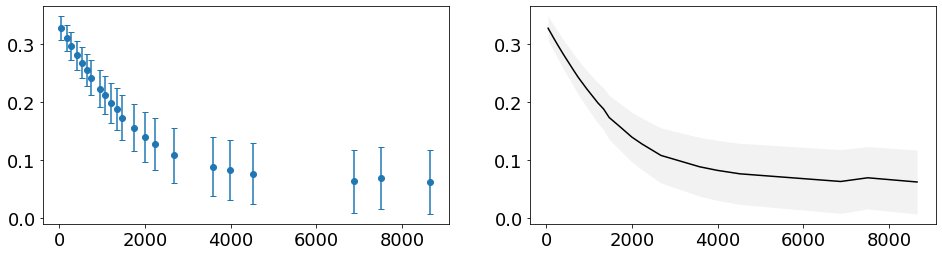

In [12]:
fig,ax=plt.subplots(1,2,figsize=(16,4))
x=data.index
y=data.iloc[:,0]
yerr=data.iloc[:,1]
ax[0].errorbar(x=x,y=y,yerr=yerr,fmt='o',capsize=3)
ax[1].plot(x, y,color='black')
ax[1].fill_between(x,y-yerr,y+yerr,
                        facecolor='grey',
                        edgecolor='face',
                        alpha=0.1,
                        linewidth=0)


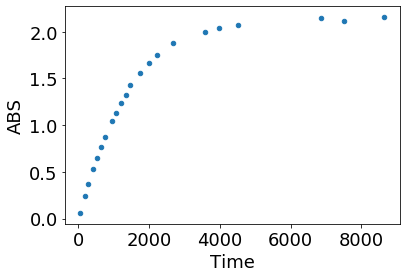

In [13]:
import uncertainties
A_inf=uncertainties.ufloat(2.155,0.1)
readin=pd.read_csv('data'+os.sep+'new.txt',skiprows=2).values
dicten={}
dicten['Time']=readin[::3][:,0]
dicten['ABS']=readin[1::3][:,0]

from uncertainties.unumpy import log10
dicten['ln(ABS)']=log10(A_inf-dicten['ABS']/A_inf)

data=pd.DataFrame.from_dict(dicten)
fig,ax=plt.subplots()
data.plot(x ='Time', y='ABS', kind = 'scatter',ax=ax)

In [14]:
data.index=data['Time']
#data=data.drop(labels='Time',axis=1)
data.head()

,Time,ABS,ln(ABS)
Time,,,
47.0,47.0,0.061,0.328+/-0.021
179.0,179.0,0.240,0.310+/-0.022
285.0,285.0,0.373,0.297+/-0.024
417.0,417.0,0.528,0.281+/-0.025
527.0,527.0,0.646,0.268+/-0.027


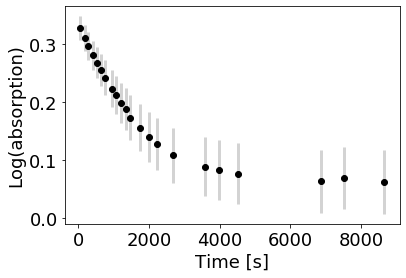

In [15]:
from uncertainties.unumpy import nominal_values as nv
from uncertainties.unumpy import std_devs as sd

fig,ax=plt.subplots()
ax.errorbar(x=data['Time'], y=nv(data['ln(ABS)']), yerr=sd(data['ln(ABS)']), fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);
_=ax.set_xlabel('Time [s]');_=ax.set_ylabel('Log(absorption)')

In [16]:
if 0:
    data['log_val']=nv(data['ln(ABS)'])
    data['log_err']=sd(data['ln(ABS)'])
    data.to_csv('data_with_error.csv',columns=['log_val','log_err'],sep='\t')

In [17]:
from uncertainties import unumpy
def eplot(x,y,*args,**kwargs):
    '''function to make plot using error vectors as input from https://github.com/lebigot/uncertainties/issues/26#issue-25588450'''
    nominal_curve = plt.plot(x, unumpy.nominal_values(y), *args, **kwargs)
    plt.fill_between(x, 
                        unumpy.nominal_values(y)-unumpy.std_devs(y), 
                        unumpy.nominal_values(y)+unumpy.std_devs(y),
                        facecolor=nominal_curve[0].get_color(),
                        edgecolor='face',
                        alpha=0.1,
                        linewidth=0)
    return nominal_curve

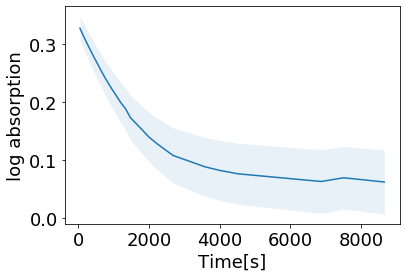

In [18]:
eplot(data['Time'].values,data['ln(ABS)'].values)
ax=plt.gca()
_=ax.set_xlabel('Time[s]');_=ax.set_ylabel('log absorption')

## 2D plotting

In [19]:
x=np.arange(-5,5,0.1)
X,Y=np.meshgrid(x,x)
def gauss2d(X,Y,mu=(0,0),sigma=(1,1)):
    scale=(sigma[0]+sigma[1])*(2*np.pi)
    expo=(X-mu[0])**2/(-2*sigma[0]**2)+(Y-mu[1])**2/(-2*sigma[1]**2)
    return np.e**expo/scale
Z=gauss2d(X,Y)

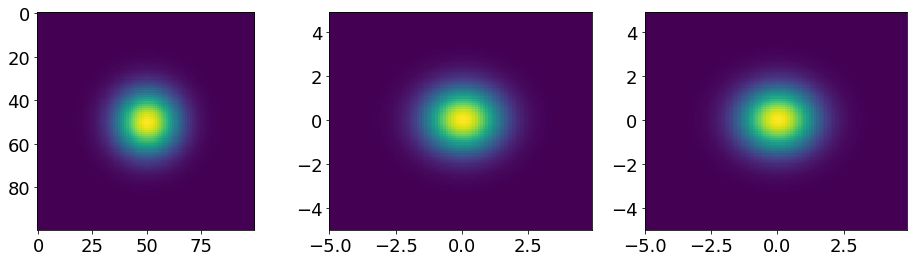

In [20]:
fig,ax=plt.subplots(1,3,figsize=(16,4))
ax[0].imshow(Z)
ax[1].pcolormesh(X,Y,Z,cmap='viridis')
ax[2].pcolor(X,Y,Z,cmap='viridis')

Text(0.5, 0, 'z-axis')

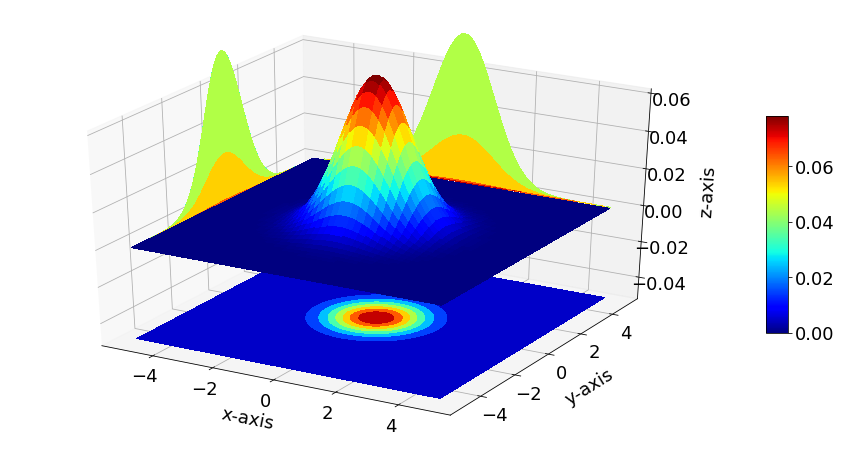

In [90]:
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(16,8))
ax= fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,Z,cmap='jet',antialiased=False)
ax.contourf(X, Y, Z, zdir='z',offset=-0.05, cmap='jet')
ax.contourf(X, Y, Z, zdir='x',offset=-5,cmap='jet')
ax.contourf(X, Y, Z, zdir='y',offset=5, cmap='jet')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim3d(-0.05,0.06)
ax.set_xlabel('x-axis',labelpad=15)
ax.set_ylabel('y-axis',labelpad=15)
ax.set_zlabel('z-axis',labelpad=15)

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

## Homework

We have an iron carbene complex that after light excitation performs the reaction A-> B  with the first order lifetime $\tau_{decay}$=1/reactionrate 2ns.
see this science paper for the full story:
https://science.sciencemag.org/content/363/6424/249

Read in the spectra of both complexes from the file Iron_carbene_4_3.csv in the data folder and make a nice plot (with all labels)
Make an inset (small figure in figure) on the region around 425 - 550nm with the y-axis in logscale

Create vectors or Dataframes that includes the relative concentrations A and B as a function of time from 0 to 10ns
You can of course use numerical integration to do this, but we have a simple first order reaction here and maybe using a formula might be easier.
In a new figure plot the concentrations as function of time. 

Use these concentrations as intensities for the measured spectra to make a linear combination with the measured spectrum and create a pcolourmesh plot. So if $A(\lambda)$ is the spectrum from A, $c_A(t)$ the concentration of A at time t. Then the linear combination is:

$\text{Total Spectrum}(t)=c_A(t) * A(\lambda) + c_B(t) * B(\lambda)$ is the spectrum at time t. 

If you use vectors for the concentrations as function of time you will get a 2d Matrix that contains the spectra as function of time. 

You can either use matrix multiplication (hint play with transposing Matrix.T) to achieve this or loop through the time points. 

Plotting Hint X,Y=meshgrid(wavelength,time)
Z=your matrix, check the dimensions, which is X and which is Y




### If you are bored


The components of the reversible first order reaction A <-> B -> C each have a gaussian peak as spectrum:

* Gauss(mu,sigma)
* A=2*G(250nm,500nm) + 1*G(500nm,150nm)
* B=3*G(200nm,500nm) + 0.9*G(700nm,200nm)
* C=1*G(200nm,800nm)

A -> B =1mMol/s , B->A = 0.2 mMol/s, B-> C = 1mMol/s

numerically integrate the rate equation (using loops) and multiply each component with the corresponding spectrum.
Plot the summed spectra (A+B+C) in 3d the corresponding projections.